# IMDB Binary Classification
## Deep Learning w/ Keras
### Deep Learning w/ Keras_ Ch3.3.1 pg.68
### Dataset: 50000(train/test (%): 50/50)

In [1]:
# Step 01: Loading the IMDB dataset 

from tensorflow import keras
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])
decoded_review= ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [2]:
# Step 02: Preparing the data
import numpy as np
def vectorize_sequences(sequences, dimensions= 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)
x_train[0]

y_train= np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

In [3]:
# Step 03: Building your network
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics=['accuracy'])

In [4]:
# Using custom optimizer (?), loss & metrics
# from keras import optimizers -> ????
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop', loss= losses.binary_crossentropy, metrics= [metrics.binary_accuracy])

In [5]:
# Step 04: Validation the Approach
x_val= x_train[:10000]
partial_x_train= x_train[10000:]

y_val= y_train[:10000]
partial_y_train= y_train[10000:]

In [6]:
# Step 05: Training the Model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history= model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4924 - acc: 0.7853 - val_loss: 0.3624 - val_acc: 0.8706
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2824 - acc: 0.9034 - val_loss: 0.2925 - val_acc: 0.8855
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2065 - acc: 0.9312 - val_loss: 0.3030 - val_acc: 0.8754
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1618 - acc: 0.9485 - val_loss: 0.2775 - val_acc: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1328 - acc: 0.9551 - val_loss: 0.2984 - val_acc: 0.8799
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1132 - acc: 0.9637 - val_loss: 0.3048 - val_acc: 0.8810
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0915 - acc: 0.9711 - val_loss: 0.3403 - val_acc: 0.8794
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0750 - a

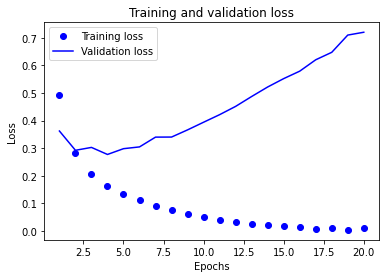

In [7]:
# Step 06: Plotting results
import matplotlib.pyplot as plt
history_dict= history.history
history_dict.keys()

loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']

epochs= range(1, len(history_dict['acc'])+1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

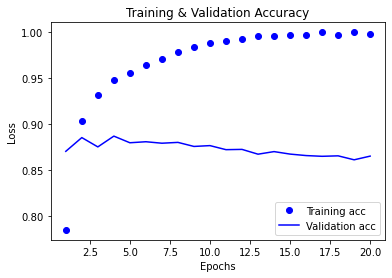

In [8]:
plt.clf()
acc_values= history_dict['acc']
val_acc_values= history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
# Step 07: Retraining a model from scratch
model= models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4473 - accuracy: 0.8182
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2537 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1976 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2951 - accuracy: 0.8833


[0.2951006293296814, 0.8832799792289734]